In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import distances
from MDAnalysis.analysis import rms
from MDAnalysis.analysis import align
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.ndimage import uniform_filter1d

In [2]:
pdb_path = "../../1cm8_data/frame.pdb"
traj_path_test001 = "../../1cm8_data/test_001/traj_4us_PBC_fit.xtc"
traj_path_test002 = "../../1cm8_data/test_002/traj_4us_PBC_fit.xtc"

In [3]:
color_list = ["#ff5100","#b35348","#ff00e8","#7a0091","#0059ff","#008da5","#7cfe89","#fbdc00"]
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", color_list)

In [4]:
sys1cm8_001 = mda.Universe(pdb_path, traj_path_test001)
sys1cm8_002 = mda.Universe(pdb_path, traj_path_test002)

FileNotFoundError: [Errno 2] No such file or directory: '../../1cm8_data/frame.pdb'

# Main Domain Opening

## 001

In [ ]:
atomLys_001 = sys1cm8_001.select_atoms("resid 49 and name NZ")
atomAsp_001 = sys1cm8_001.select_atoms("resid 146 and name OD1 OD2") #CG
atomLys_001.positions - atomAsp_001.positions

array([[10.270004 , -2.9199982, -1.9500008],
       [ 8.190002 , -2.3899994, -1.8400002]], dtype=float32)

In [ ]:
domain_opening = distances.distance_array(atomLys_001.positions, atomAsp_001.positions, box=sys1cm8_001.dimensions)
print(domain_opening)

[[10.85365724  8.7277623 ]]


In [ ]:
domain_opening_list_001 = []
frame_time_001 = []
for ts in sys1cm8_001.trajectory:
    domain_opening = np.min(distances.distance_array(atomLys_001.positions, atomAsp_001.positions, box=sys1cm8_001.dimensions)[0])
    domain_opening_list_001.append(domain_opening)
    frame_time_001.append(ts.time)

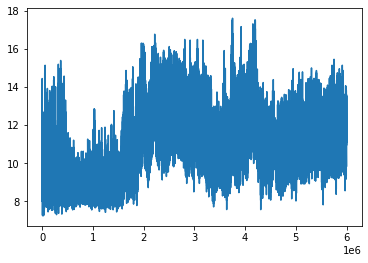

In [ ]:
plt.plot(frame_time_001, domain_opening_list_001)

## 002

In [ ]:
atomLys_002 = sys1cm8_002.select_atoms("resid 49 and name NZ")
atomAsp_002 = sys1cm8_002.select_atoms("resid 146 and name OD1 OD2") #CG
atomLys_002.positions - atomAsp_002.positions

array([[10.270004 , -2.9199982, -1.9500008],
       [ 8.190002 , -2.3899994, -1.8400002]], dtype=float32)

In [ ]:
domain_opening_list_002 = []
frame_time_002 = []
for ts in sys1cm8_002.trajectory:
    domain_opening = np.min(distances.distance_array(atomLys_002.positions, atomAsp_002.positions, box=sys1cm8_002.dimensions)[0])
    domain_opening_list_002.append(domain_opening)
    frame_time_002.append(ts.time)

(0.0, 20.0)

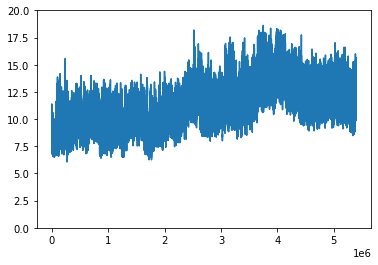

In [ ]:
fig, ax = plt.subplots()
ax.plot(frame_time_002, domain_opening_list_002)
ax.set_ylim(0, 20)

(0.0, 20.0)

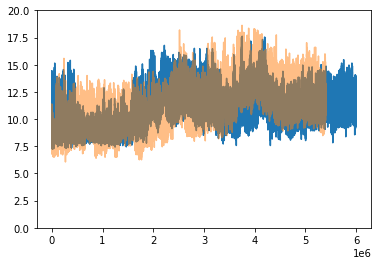

In [ ]:
fig, ax = plt.subplots()
ax.plot(frame_time_001, domain_opening_list_001)
ax.plot(frame_time_002, domain_opening_list_002, alpha=0.5)
ax.set_ylim(0, 20)

In [ ]:
mov_avg_001 = uniform_filter1d(domain_opening_list_001, size=20)
mov_avg_002 = uniform_filter1d(domain_opening_list_002, size=20)

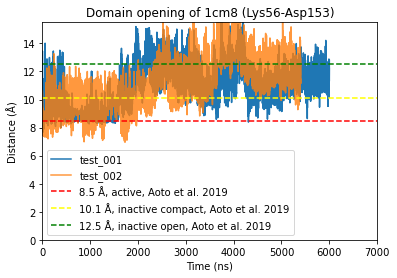

In [ ]:
fig, ax = plt.subplots()
ax.plot([x/1000 for x in frame_time_001], mov_avg_001)
ax.plot([x/1000 for x in frame_time_002], mov_avg_002, alpha=0.8)
plt.axhline(y=8.5, color='red', linestyle='--')
plt.axhline(y=10.1, color='yellow', linestyle='--')
plt.axhline(y=12.5, color='green', linestyle='--')
ax.set_ylim(0, 15.5)
ax.set_xlim(0, 7000)
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Distance (Å)")
ax.legend(["test_001", "test_002", "8.5 Å, active, Aoto et al. 2019", "10.1 Å, inactive compact, Aoto et al. 2019", "12.5 Å, inactive open, Aoto et al. 2019"])
ax.title.set_text("Domain opening of 1cm8 (Lys56-Asp153)")

In [ ]:
fig, ax = plt.subplots()
ax.plot([x/1000 for x in frame_time_001], mov_avg_001)
ax.plot([x/1000 for x in frame_time_002], mov_avg_002, alpha=0.8)
plt.axhline(y=8.5, color='red', linestyle='--')
plt.axhline(y=10.1, color='yellow', linestyle='--')
plt.axhline(y=12.5, color='green', linestyle='--')
ax.set_ylim(0, 15.5)
ax.set_xlim(0, 5200)
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Distance (Å)")
ax.legend(["test_001", "test_002", "8.5 Å, active, Aoto et al. 2019", "10.1 Å, inactive compact, Aoto et al. 2019", "12.5 Å, inactive open, Aoto et al. 2019"])
ax.title.set_text("Domain opening of 1cm8 (Lys56-Asp153)")

# αC−L16 interactions

## 001

In [ ]:
atomArg_001 = sys1cm8_001.select_atoms("resid 66 and name HH11 HH12 HH21 HH22") #NH1 NH2
atomAsp324_001 = sys1cm8_001.select_atoms("resid 324 and name OD1 OD2") #CG

In [ ]:
alphaC_L16_dist_001 = []
frame_time_001 = []
for ts in sys1cm8_001.trajectory:
    alphaC_L16_dist_001.append(np.min(distances.distance_array(atomArg_001.positions, atomAsp324_001.positions, box=sys1cm8_001.dimensions)[0])-1.01)
    frame_time_001.append(ts.time)

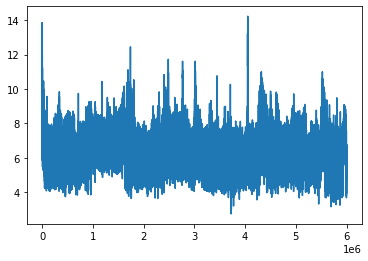

In [ ]:
fig, ax = plt.subplots()
ax.plot(frame_time_001, alphaC_L16_dist_001)

## 002

In [ ]:
atomArg_002 = sys1cm8_002.select_atoms("resid 66 and name HH11 HH12 HH21 HH22") #NH1 NH2
atomAsp324_002 = sys1cm8_002.select_atoms("resid 324 and name OD1 OD2") #CG

In [ ]:
alphaC_L16_dist_002 = []
frame_time_002 = []
for ts in sys1cm8_002.trajectory:
    alphaC_L16_dist_002.append(np.min(distances.distance_array(atomArg_002.positions, atomAsp324_002.positions, box=sys1cm8_002.dimensions)[0])-1.001)
    frame_time_002.append(ts.time)

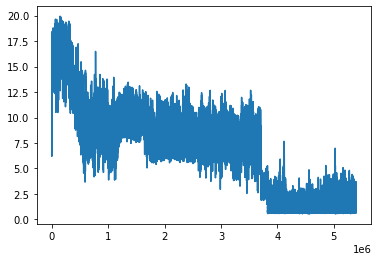

In [ ]:
fig, ax = plt.subplots()
ax.plot(frame_time_002, alphaC_L16_dist_002)


## combined

In [ ]:
mov_avg_alphaC_L16_dist_001 = uniform_filter1d(alphaC_L16_dist_001, size=20)
mov_avg_alphaC_L16_dist_002 = uniform_filter1d(alphaC_L16_dist_002, size=20)

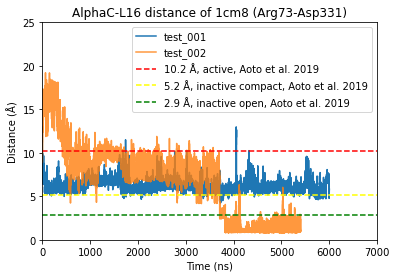

In [ ]:
fig, ax = plt.subplots()
ax.plot([x/1000 for x in frame_time_001], mov_avg_alphaC_L16_dist_001)
ax.plot([x/1000 for x in frame_time_002], mov_avg_alphaC_L16_dist_002, alpha=0.8)
plt.axhline(y=10.2, color='red', linestyle='--')
plt.axhline(y=5.2, color='yellow', linestyle='--')
plt.axhline(y=2.9, color='green', linestyle='--')
ax.set_ylim(0, 25)
ax.set_xlim(0, 7000)
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Distance (Å)")
ax.legend(["test_001", "test_002", "10.2 Å, active, Aoto et al. 2019", "5.2 Å, inactive compact, Aoto et al. 2019", "2.9 Å, inactive open, Aoto et al. 2019"])
ax.title.set_text("AlphaC-L16 distance of 1cm8 (Arg73-Asp331)")


# 1cm8 Lys56-Glu74

In [ ]:
atomLys56_001 = sys1cm8_001.select_atoms("resid 49 and name NZ")
atomGlu74_001 = sys1cm8_001.select_atoms("resid 67 and name OE1 OE2") #CD
atomLys56_002 = sys1cm8_002.select_atoms("resid 49 and name NZ")
atomGlu74_002 = sys1cm8_002.select_atoms("resid 67 and name OE1 OE2") #CD

In [ ]:
lys56glu74_dist_001 = []
frame_time_001 = []
for ts in sys1cm8_001.trajectory:
    lys56glu74_dist_001.append(np.min(distances.distance_array(atomLys56_001.positions, atomGlu74_001.positions, box=sys1cm8_001.dimensions)[0]))
    frame_time_001.append(ts.time)

In [ ]:
lys56glu74_dist_002 = []
frame_time_002 = []
for ts in sys1cm8_002.trajectory:
    lys56glu74_dist_002.append(np.min(distances.distance_array(atomLys56_002.positions, atomGlu74_002.positions, box=sys1cm8_002.dimensions)[0]))
    frame_time_002.append(ts.time)

In [ ]:
mov_avg_lys56glu74_dist_001 = uniform_filter1d(lys56glu74_dist_001, size=100)
mov_avg_lys56glu74_dist_002 = uniform_filter1d(lys56glu74_dist_002, size=100)

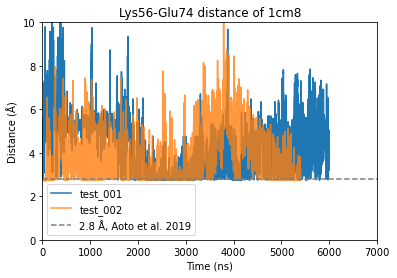

In [ ]:
fig, ax = plt.subplots()
ax.plot([x/1000 for x in frame_time_001], mov_avg_lys56glu74_dist_001)
ax.plot([x/1000 for x in frame_time_002], mov_avg_lys56glu74_dist_002, alpha=0.8)
plt.axhline(y=2.8, color='grey', linestyle='--')
ax.set_xlim(0, 7000)
ax.set_ylim(0, 10)
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Distance (Å)")
ax.legend(["test_001", "test_002", "2.8 Å, Aoto et al. 2019"])
ax.title.set_text("Lys56-Glu74 distance of 1cm8")

# RMSD aligned to bottom

In [ ]:
def align_traj(u, group='backbone'):
    """
    Do the alignment based on frame 0
    """
    u.trajectory[0]
    aligner = align.AlignTraj(u, u, select=group, in_memory=True, ).run()

In [ ]:
def rmsd_aligned_to_something(u, rmsd_group = ("backbone"), align_group = ("backbone and resid 106-300")):
    u.trajectory[0]
    # align trajectory w.r.t that chain
    align_traj(u, group = align_group)
    # Calc RMSD w.r.t that chain
    rmsd_analysis = rms.RMSD(u, select=rmsd_group, )
    rmsd_analysis.run()
    df = pd.DataFrame(rmsd_analysis.results['rmsd'].T[1:].T,
                              columns = ['time', 'RMSD'],
                              index = np.arange(len(rmsd_analysis.results['rmsd'].T[0]))
                             )
    return df

In [ ]:
#df_rmsd_001 = rmsd_aligned_to_something(sys1cm8_001, rmsd_group = ("backbone"), align_group = ("backbone and resid 106-300"))
#df_rmsd_001.to_csv("../../1cm8_data/plots_talk_paris/cLobe_rmsd_001.csv", index=False)
df_cLobe_rmsd_001 = pd.read_csv("../../1cm8_data/plots_talk_paris/cLobe_rmsd_001.csv")

In [ ]:
#df_rmsd_002 = rmsd_aligned_to_something(sys1cm8_002, rmsd_group = ("backbone"), align_group = ("backbone and resid 106-300"))
#df_rmsd_002.to_csv("../../1cm8_data/plots_talk_paris/cLobe_rmsd_002.csv", index=False)
df_cLobe_rmsd_002 = pd.read_csv("../../1cm8_data/plots_talk_paris/cLobe_rmsd_002.csv")

In [ ]:
#df_rmsd_001 = rmsd_aligned_to_something(sys1cm8_001, rmsd_group = ("backbone"), align_group = ("backbone"))
#df_rmsd_001.to_csv("../../1cm8_data/plots_talk_paris/rmsd_001.csv", index=False)
df_rmsd_001 = pd.read_csv("../../1cm8_data/plots_talk_paris/rmsd_001.csv")

In [ ]:
#df_rmsd_002 = rmsd_aligned_to_something(sys1cm8_002, rmsd_group = ("backbone"), align_group = ("backbone"))
#df_rmsd_002.to_csv("../../1cm8_data/plots_talk_paris/rmsd_002.csv", index=False)
df_rmsd_002 = pd.read_csv("../../1cm8_data/plots_talk_paris/rmsd_002.csv")

<AxesSubplot:title={'center':'RMSD of 1cm8 to Clobe'}, xlabel='time'>

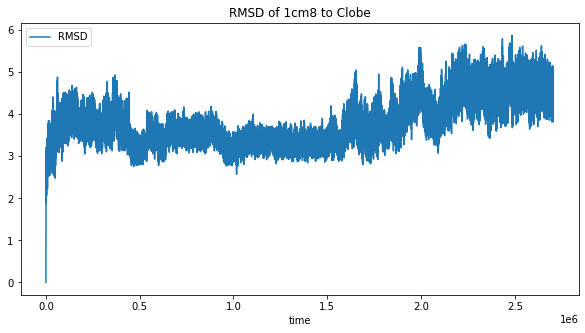

In [ ]:
df_cLobe_rmsd_001.plot(x='time', y='RMSD', figsize=(10, 5), title="RMSD of 1cm8 to Clobe")

<AxesSubplot:title={'center':'RMSD of 1cm8 to Clobe'}, xlabel='time'>

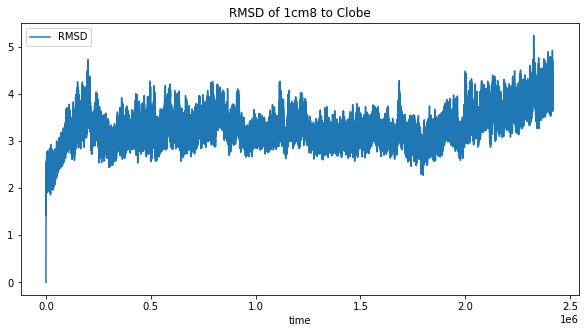

In [ ]:
df_cLobe_rmsd_002.plot(x='time', y='RMSD', figsize=(10, 5), title="RMSD of 1cm8 to Clobe")

In [ ]:
df_cLobe_rmsd_001["time_ns"] = df_cLobe_rmsd_001["time"]/1000
df_cLobe_rmsd_002["time_ns"] = df_cLobe_rmsd_002["time"]/1000

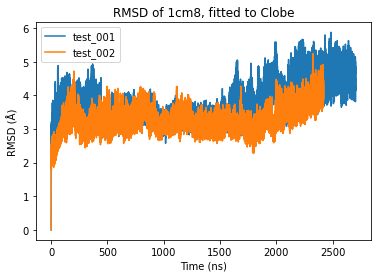

In [ ]:
ax = df_cLobe_rmsd_001.plot(x='time_ns', y='RMSD', title="RMSD of 1cm8, fitted to Clobe")
df_cLobe_rmsd_002.plot(x='time_ns', y='RMSD', ax=ax)
ax.set_xlabel("Time (ns)")
ax.set_ylabel("RMSD (Å)")
ax.legend(["test_001", "test_002"])

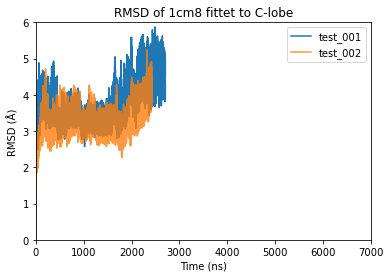

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_cLobe_rmsd_001['time']/1000, df_cLobe_rmsd_001['RMSD'])
ax.plot(df_cLobe_rmsd_002['time']/1000, df_cLobe_rmsd_002['RMSD'], alpha=0.8)
ax.set_xlim(0, 7000)
ax.set_ylim(0, 6)
ax.set_xlabel("Time (ns)")
ax.set_ylabel("RMSD (Å)")
ax.legend(["test_001", "test_002"])
ax.title.set_text("RMSD of 1cm8 fittet to C-lobe")

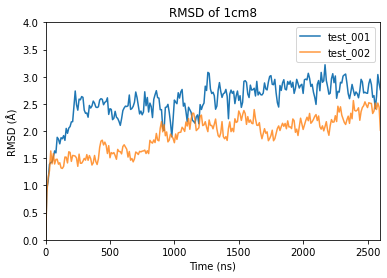

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_rmsd_001['time'], df_rmsd_001['RMSD'])
ax.plot(df_rmsd_002['time'], df_rmsd_002['RMSD'], alpha=0.8)
ax.set_xlim(0, 2600)
ax.set_ylim(0, 4)
ax.set_xlabel("Time (ns)")
ax.set_ylabel("RMSD (Å)")
ax.legend(["test_001", "test_002"])
ax.title.set_text("RMSD of 1cm8")

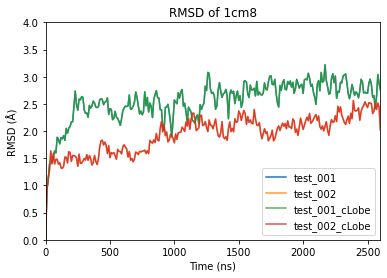

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_rmsd_001['time'], df_rmsd_001['RMSD'])
ax.plot(df_rmsd_002['time'], df_rmsd_002['RMSD'], alpha=0.8)
ax.plot(df_cLobe_rmsd_001['time'], df_cLobe_rmsd_001['RMSD'], alpha=0.8)
ax.plot(df_cLobe_rmsd_002['time'], df_cLobe_rmsd_002['RMSD'], alpha=0.8)
ax.set_xlim(0, 2600)
ax.set_ylim(0, 4)
ax.set_xlabel("Time (ns)")
ax.set_ylabel("RMSD (Å)")
ax.legend(["test_001", "test_002", "test_001_cLobe", "test_002_cLobe"])
ax.title.set_text("RMSD of 1cm8")